# Principal Component Analysis

Como se vio en la presentación, las principales funciones del PCA es reducir dimensiones por dos cosas:

1) Ayudarnos a hacer más rápido el ajuste de nuestros modelos. Con menos dimensiones que ajustar, el proceso se acelera

2) Poder visualizar de alguna forma la información de muchas dimensiones reduciéndola a dos o tres dimensiones.

## PCA para visualizar datos 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('data_spotify.csv')
spotify = spotify.iloc[:, 1:]
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Tenemos 13 dimensiones/variables y quiero reducirlo a 2 para verlo en un scatter, por ejemplo

In [3]:
# Separo mis atributos del target
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
            'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
x = spotify.loc[:, features].values

In [4]:
y = spotify.loc[:,['target']].values

In [5]:
# Tengo que reescalar mis atributos porque al final lo que voy a hacer el combinarlos para quedarme con 2.
# Si los voy a combinar es bastante conveniente que estén en la misma escala
from sklearn.preprocessing import StandardScaler # Resto media y divido entre desviación estándar

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627


In [6]:
# Ahora sí, necesito el PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Especifico que quiero que haga 2 componentes

In [7]:
principalComponents = pca.fit_transform(x) # Ajusto el modelo

In [8]:
# Veo el ajusto como base de datos
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.281199,-0.937396
1,1.081936,-0.946573
2,0.218234,-1.563693
3,3.652609,-0.378697
4,0.614862,0.466888


In [9]:
# Junto mis componentes principales con la variable de target
finalDf = pd.concat([principalDf, spotify[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-0.281199,-0.937396,1
1,1.081936,-0.946573,1
2,0.218234,-1.563693,1
3,3.652609,-0.378697,1
4,0.614862,0.466888,1


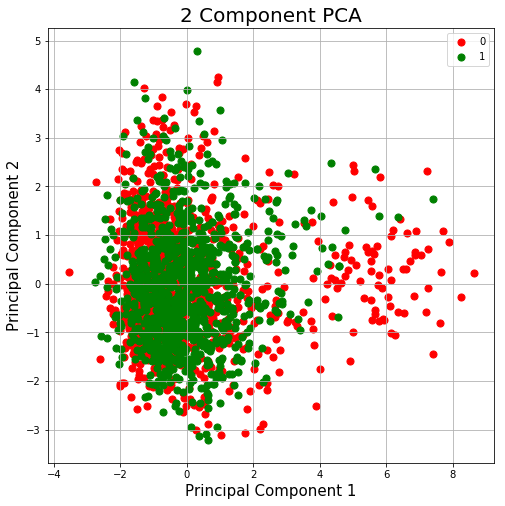

In [10]:
# Ahora sí lo grafico como un scater, con los componentes en los ejes, y coloreados por el target
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
# Parece que reducirlo tanto no funciona para este caso, pero el chiste es que entiendan qué hace.
# Vamos a ver cuánto de la varianza de los atributos me está explicando cada componente
pca.explained_variance_ratio_

array([0.21891041, 0.1173393 ])

In [12]:
0.21891041+0.1173393

0.33624971

Esto quiere decir que los dos compenentes que hice unicamente contienen el 33.6% de la información en mis datos originales, por lo que quizá la reducción a sólo 2 componentes es demasiado, porque perdí casi toda mi información.

# PCA para eficientar procesos

Vamos a utilizar la misma base, y para ver la comparación de todas las variables vs la reducción con PCA corramos un logit antes y después a ver si mejora tiempo o precisión, ya que muchas veces el balance entre estas dos es un trade off

In [13]:
# Leamos los datos de nuevo
spotify = pd.read_csv('data_spotify.csv')
spotify = spotify.iloc[:, 1:]
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [14]:
# Primero va el modelo sin el PCA
X = spotify.iloc[:, :13]
y = spotify.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
import timeit

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver='liblinear')

%timeit logit.fit(X_train, y_train)

3.48 ms ± 635 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
y_pred=logit.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.5321782178217822
[[ 83 120]
 [ 69 132]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       203
           1       0.52      0.66      0.58       201

   micro avg       0.53      0.53      0.53       404
   macro avg       0.53      0.53      0.53       404
weighted avg       0.53      0.53      0.52       404



Probemos con PCA, a ver si mejora tiempo o precisión

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/azu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/azu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/azu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [19]:
# Voy a reducir dimensiones, Le digo que se quede con 95% de la info
pca = PCA(.95)

pca.fit(X_train)

pca.n_components_

11

sí se redujo, de los 13 atributos originales reduje un poco, a 11.

In [20]:
# Hago la transformación de las variables a mis componentes
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [25]:
# Y ahora sí, a ver
logit = LogisticRegression(solver='liblinear')

%timeit logit.fit(X_train, y_train)

3.61 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
y_pred=logit.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.6485148514851485
[[136  67]
 [ 75 126]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       203
           1       0.65      0.63      0.64       201

   micro avg       0.65      0.65      0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404

